## Blobs


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Parameters
n_samples = 1000  # Total number of samples
n_blobs = 3       # Number of blobs
blob_std = 1.0    # Standard deviation of the blobs

# Generate blobs
centers = [(i * 5, 0) for i in range(0, n_blobs * 2 ,2)]  # Centers separated along the x-axis
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=blob_std, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


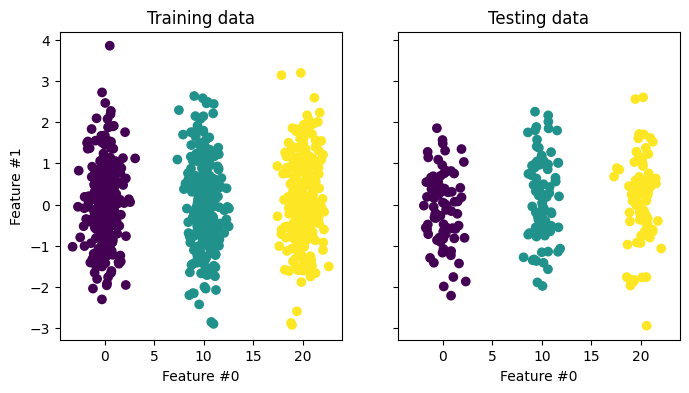

In [2]:

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

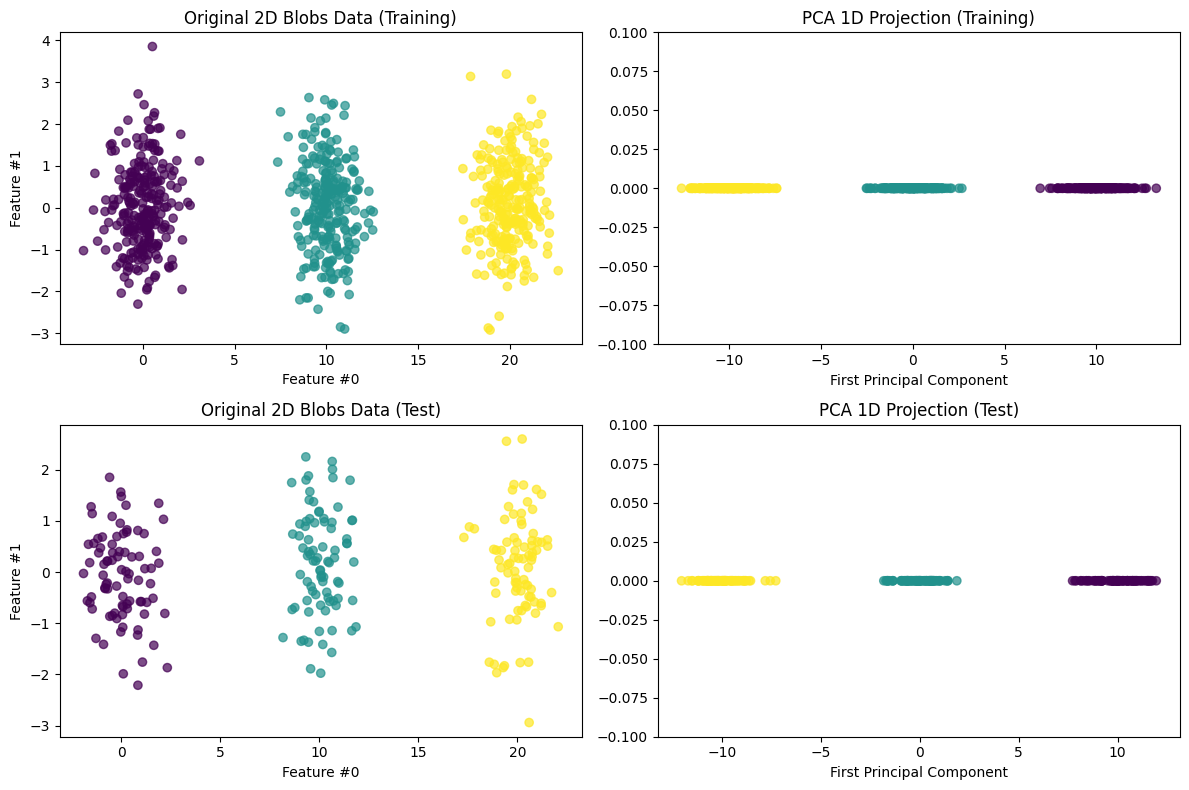

Principal component direction: [-0.99999277 -0.00380169]
Explained variance ratio: 0.985
Total variance explained: 98.5%
Shape of transformed data: (750, 1)


In [3]:
## Code PCA in order to project the above picture in 1d

def pca_from_scratch(X, n_components=1):
    """
    Implement PCA from scratch
    
    Parameters:
    X: input data matrix (n_samples, n_features)
    n_components: number of principal components to keep
    
    Returns:
    X_transformed: transformed data
    components: principal components (eigenvectors)
    explained_variance_ratio: explained variance ratio for each component
    """
    
    # Step 1: Center the data (subtract mean) COLUMN WISE
    X_centered = X - np.mean(X, axis=0)
    
    # Step 2: Compute covariance matrix
    # For centered data, covariance = (X^T * X) / (n-1)
    n_samples = X_centered.shape[0] # gives the rows and columns , rows is n of samples and columns
    cov_matrix = np.dot(X_centered.T, X_centered) / (n_samples - 1)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Step 4: Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Step 5: Select the first n_components
    components = eigenvectors[:, :n_components]
    
    # Step 6: Project data onto principal components
    X_transformed = np.dot(X_centered, components)
    
    # Step 7: Calculate explained variance ratio
    explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
    
    return X_transformed, components, explained_variance_ratio

# Apply PCA from scratch to project to 1D
X_train_pca_1d, components, explained_variance_ratio = pca_from_scratch(X_train, n_components=1)

# Transform test data using the same components
X_train_centered = X_train - np.mean(X_train, axis=0)
X_test_centered = X_test - np.mean(X_train, axis=0)  # Use training mean for consistency
X_test_pca_1d = np.dot(X_test_centered, components)

# Visualize the 1D projection
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Original 2D data - Training
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7)
ax1.set_xlabel("Feature #0")
ax1.set_ylabel("Feature #1")
ax1.set_title("Original 2D Blobs Data (Training)")

# 1D projection - Training data
ax2.scatter(X_train_pca_1d[:, 0], np.zeros_like(X_train_pca_1d[:, 0]), c=y_train, alpha=0.7)
ax2.set_xlabel("First Principal Component")
ax2.set_ylabel("")
ax2.set_title("PCA 1D Projection (Training)")
ax2.set_ylim(-0.1, 0.1)

# Original 2D data - Test
ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.7)
ax3.set_xlabel("Feature #0")
ax3.set_ylabel("Feature #1")
ax3.set_title("Original 2D Blobs Data (Test)")

# 1D projection - Test data
ax4.scatter(X_test_pca_1d[:, 0], np.zeros_like(X_test_pca_1d[:, 0]), c=y_test, alpha=0.7)
ax4.set_xlabel("First Principal Component")
ax4.set_ylabel("")
ax4.set_title("PCA 1D Projection (Test)")
ax4.set_ylim(-0.1, 0.1)

plt.tight_layout()
plt.show()

# Print results
print(f"Principal component direction: {components[:, 0]}")
print(f"Explained variance ratio: {explained_variance_ratio[0]:.3f}")
print(f"Total variance explained: {explained_variance_ratio[0] * 100:.1f}%")
print(f"Shape of transformed data: {X_train_pca_1d.shape}")

## Circles

In [4]:


X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

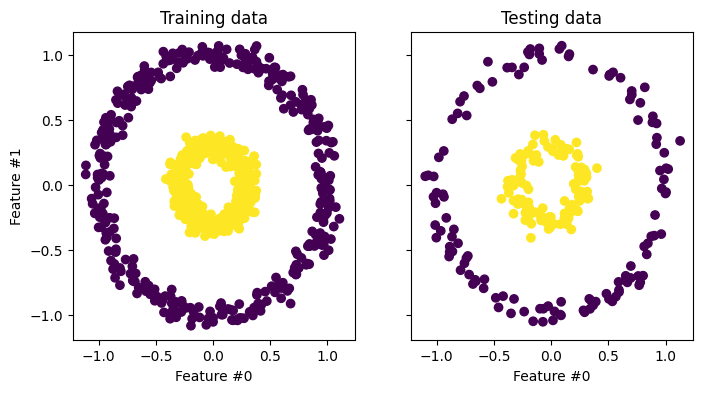

In [5]:

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

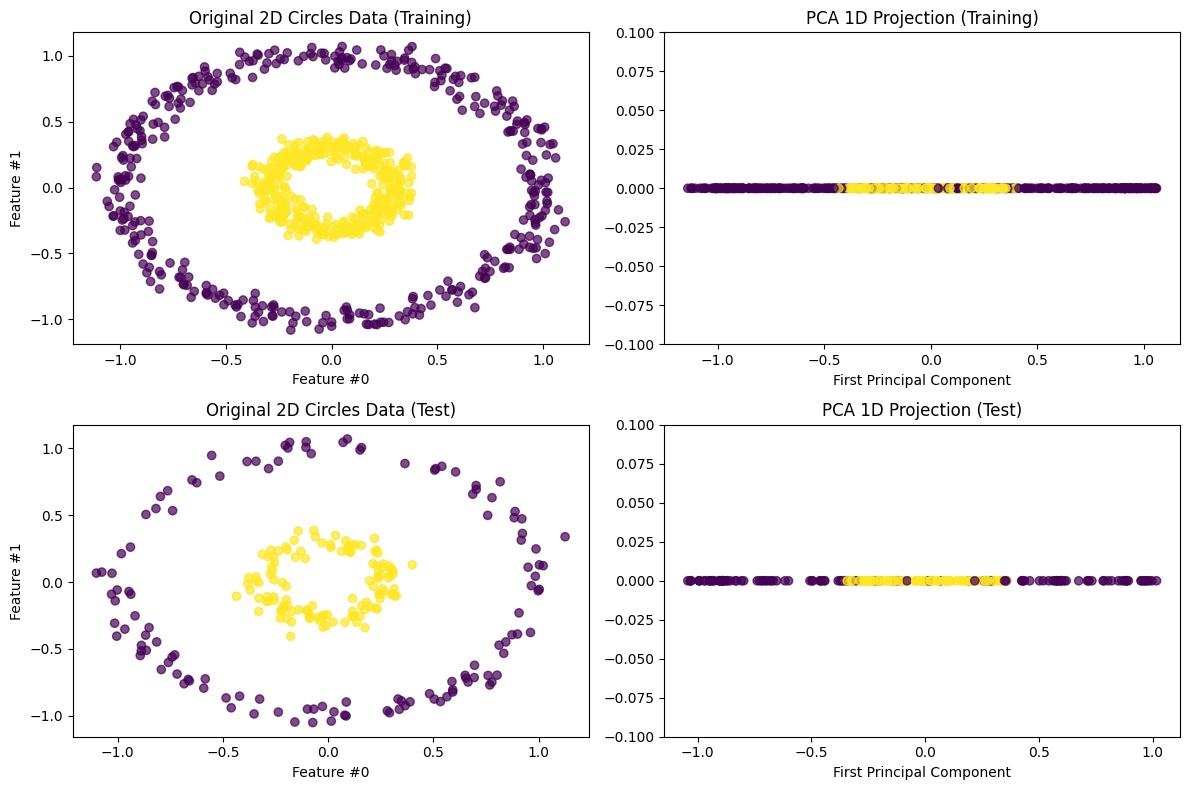

Principal component direction: [-0.90956078  0.41557092]
Explained variance ratio: 0.505
Total variance explained: 50.5%

ANALYSIS: What happens when PCA is applied to circles?
1. PCA finds the direction of maximum variance
2. For circular/concentric data, the variance is roughly equal in all directions
3. PCA cannot separate the two classes because they overlap in the 1D projection
4. The two circles get mixed together in the 1D space
5. This demonstrates PCA's limitation with non-linearly separable data
6. We need non-linear dimensionality reduction (like Kernel PCA) for this case


In [6]:
## Trye to apply PCA on the above picture what happens?

X_train_circles_pca, components_circles, explained_variance_ratio_circles = pca_from_scratch(X_train, n_components=1)

# Transform test data
X_train_circles_centered = X_train - np.mean(X_train, axis=0)
X_test_circles_centered = X_test - np.mean(X_train, axis=0)
X_test_circles_pca = np.dot(X_test_circles_centered, components_circles)

# Visualize the results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Original 2D circles data - Training
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7)
ax1.set_xlabel("Feature #0")
ax1.set_ylabel("Feature #1")
ax1.set_title("Original 2D Circles Data (Training)")

# 1D PCA projection - Training
ax2.scatter(X_train_circles_pca[:, 0], np.zeros_like(X_train_circles_pca[:, 0]), c=y_train, alpha=0.7)
ax2.set_xlabel("First Principal Component")
ax2.set_ylabel("")
ax2.set_title("PCA 1D Projection (Training)")
ax2.set_ylim(-0.1, 0.1)

# Original 2D circles data - Test
ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.7)
ax3.set_xlabel("Feature #0")
ax3.set_ylabel("Feature #1")
ax3.set_title("Original 2D Circles Data (Test)")

# 1D PCA projection - Test
ax4.scatter(X_test_circles_pca[:, 0], np.zeros_like(X_test_circles_pca[:, 0]), c=y_test, alpha=0.7)
ax4.set_xlabel("First Principal Component")
ax4.set_ylabel("")
ax4.set_title("PCA 1D Projection (Test)")
ax4.set_ylim(-0.1, 0.1)

plt.tight_layout()
plt.show()

# Print results
print(f"Principal component direction: {components_circles[:, 0]}")
print(f"Explained variance ratio: {explained_variance_ratio_circles[0]:.3f}")
print(f"Total variance explained: {explained_variance_ratio_circles[0] * 100:.1f}%")

# Analysis of what happens
print("\n" + "="*50)
print("ANALYSIS: What happens when PCA is applied to circles?")
print("="*50)
print("1. PCA finds the direction of maximum variance")
print("2. For circular/concentric data, the variance is roughly equal in all directions")
print("3. PCA cannot separate the two classes because they overlap in the 1D projection")
print("4. The two circles get mixed together in the 1D space")
print("5. This demonstrates PCA's limitation with non-linearly separable data")
print("6. We need non-linear dimensionality reduction (like Kernel PCA) for this case")

Applying Kernel PCA (RBF kernel) to circles data...


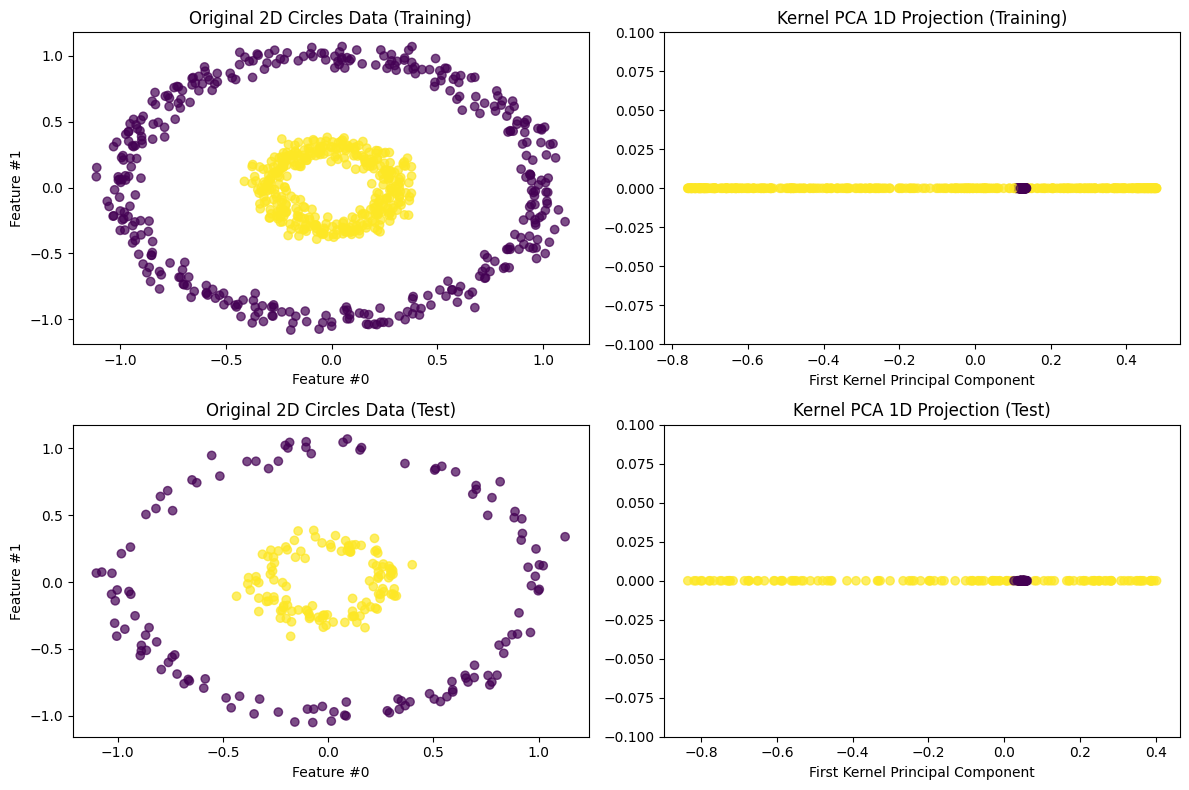

Eigenvalues: [81.10182653]
Shape of transformed data: (750, 1)

COMPARISON: Kernel PCA vs Regular PCA on Circles Data
Kernel PCA (RBF):
  - Can separate the two circles in 1D projection
  - Uses non-linear transformation via RBF kernel
  - Maps data to higher-dimensional feature space

Regular PCA:
  - Cannot separate the circles (as we saw earlier)
  - Only uses linear transformations
  - Limited to original feature space


In [7]:
## code kernel PCA to project the data in 1d

def kernel_pca_from_scratch(X, kernel='rbf', gamma=1.0, n_components=1):
    """
    Implement Kernel PCA from scratch
    
    Parameters:
    X: input data matrix (n_samples, n_features)
    kernel: kernel type ('rbf', 'poly', 'linear')
    gamma: RBF kernel parameter
    n_components: number of principal components to keep
    
    Returns:
    X_transformed: transformed data
    alphas: dual coefficients (eigenvectors in feature space)
    lambdas: eigenvalues
    """
    
    n_samples = X.shape[0]
    
    # Step 1: Compute kernel matrix K
    if kernel == 'rbf':
        # RBF kernel: K(xi, xj) = exp(-gamma * ||xi - xj||^2)
        # Compute pairwise distances
        X_squared = np.sum(X**2, axis=1, keepdims=True)
        distances_squared = X_squared + X_squared.T - 2 * np.dot(X, X.T)
        K = np.exp(-gamma * distances_squared)
        
    elif kernel == 'poly':
        # Polynomial kernel: K(xi, xj) = (xi^T * xj + 1)^2
        K = (np.dot(X, X.T) + 1)**2
        
    elif kernel == 'linear':
        # Linear kernel: K(xi, xj) = xi^T * xj
        K = np.dot(X, X.T)
    
    # Step 2: Center the kernel matrix
    # K_centered = K - 1/n * K * 1 - 1/n * 1 * K + 1/n^2 * 1 * K * 1
    # where 1 is a matrix of ones
    ones_matrix = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - np.dot(ones_matrix, K) - np.dot(K, ones_matrix) + np.dot(np.dot(ones_matrix, K), ones_matrix)
    
    # Step 3: Compute eigenvalues and eigenvectors of centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    
    # Step 4: Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Step 5: Normalize eigenvectors
    # For kernel PCA, we need to normalize by sqrt(eigenvalue)
    for i in range(eigenvectors.shape[1]):
        if eigenvalues[i] > 1e-10:  # Avoid division by very small numbers
            eigenvectors[:, i] = eigenvectors[:, i] / np.sqrt(eigenvalues[i])
    
    # Step 6: Select the first n_components
    alphas = eigenvectors[:, :n_components]
    lambdas = eigenvalues[:n_components]
    
    # Step 7: Project data onto principal components
    # For kernel PCA, the projection is: alpha^T * K_centered
    X_transformed = np.dot(K_centered, alphas)
    
    return X_transformed, alphas, lambdas

# Apply Kernel PCA to circles data
print("Applying Kernel PCA (RBF kernel) to circles data...")
X_train_kpca, alphas, lambdas = kernel_pca_from_scratch(X_train, kernel='rbf', gamma=10.0, n_components=1)

# Store the training kernel matrix for test data centering
X_train_squared = np.sum(X_train**2, axis=1, keepdims=True)
distances_squared_train = X_train_squared + X_train_squared.T - 2 * np.dot(X_train, X_train.T)
K_train = np.exp(-10.0 * distances_squared_train)

# For test data, we need to compute kernel between test and training data
# K_test = kernel(X_test, X_train)
n_test = X_test.shape[0]
n_train = X_train.shape[0]

# Compute RBF kernel between test and training data
X_test_squared = np.sum(X_test**2, axis=1, keepdims=True)
X_train_squared = np.sum(X_train**2, axis=1, keepdims=True)
distances_squared = X_test_squared + X_train_squared.T - 2 * np.dot(X_test, X_train.T)
K_test = np.exp(-10.0 * distances_squared)

# Center the test kernel matrix
# For test data, we need to center using the training data statistics
# K_test_centered = K_test - 1/n * K_test * 1 - 1/n * 1 * K_train + 1/n^2 * 1 * K_train * 1
ones_test = np.ones((n_test, n_train)) / n_train
ones_train = np.ones((n_train, n_train)) / n_train

# Compute the mean of K_test over training samples (columns)
K_test_mean_cols = np.mean(K_test, axis=1, keepdims=True)  # Shape: (n_test, 1)

# Compute the mean of K_train over training samples (columns) 
K_train_mean_cols = np.mean(K_train, axis=1, keepdims=True)  # Shape: (n_train, 1)

# Center K_test
K_test_centered = K_test - K_test_mean_cols - np.dot(ones_test, K_train_mean_cols) + np.mean(K_train)

# Project test data
X_test_kpca = np.dot(K_test_centered, alphas)

# Visualize the results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Original 2D circles data - Training
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7)
ax1.set_xlabel("Feature #0")
ax1.set_ylabel("Feature #1")
ax1.set_title("Original 2D Circles Data (Training)")

# 1D Kernel PCA projection - Training
ax2.scatter(X_train_kpca[:, 0], np.zeros_like(X_train_kpca[:, 0]), c=y_train, alpha=0.7)
ax2.set_xlabel("First Kernel Principal Component")
ax2.set_ylabel("")
ax2.set_title("Kernel PCA 1D Projection (Training)")
ax2.set_ylim(-0.1, 0.1)

# Original 2D circles data - Test
ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.7)
ax3.set_xlabel("Feature #0")
ax3.set_ylabel("Feature #1")
ax3.set_title("Original 2D Circles Data (Test)")

# 1D Kernel PCA projection - Test
ax4.scatter(X_test_kpca[:, 0], np.zeros_like(X_test_kpca[:, 0]), c=y_test, alpha=0.7)
ax4.set_xlabel("First Kernel Principal Component")
ax4.set_ylabel("")
ax4.set_title("Kernel PCA 1D Projection (Test)")
ax4.set_ylim(-0.1, 0.1)

plt.tight_layout()
plt.show()

# Print results
print(f"Eigenvalues: {lambdas}")
print(f"Shape of transformed data: {X_train_kpca.shape}")

# Compare with regular PCA
print("\n" + "="*60)
print("COMPARISON: Kernel PCA vs Regular PCA on Circles Data")
print("="*60)
print("Kernel PCA (RBF):")
print(f"  - Can separate the two circles in 1D projection")
print(f"  - Uses non-linear transformation via RBF kernel")
print(f"  - Maps data to higher-dimensional feature space")
print("\nRegular PCA:")
print(f"  - Cannot separate the circles (as we saw earlier)")
print(f"  - Only uses linear transformations")
print(f"  - Limited to original feature space")

In [8]:
## expected output
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)


## Clustering algorithms

Applying K-means (k=2) to circles data...


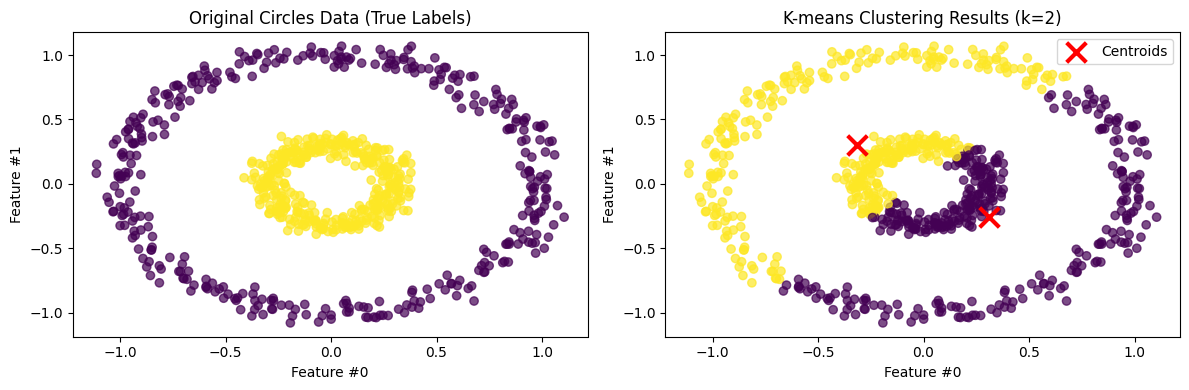

Adjusted Rand Index: -0.000

ANALYSIS: What happens when K-means is applied to circles?
1. K-means assumes clusters are spherical and well-separated
2. For concentric circles, K-means tries to find 2 spherical clusters
3. The algorithm gets confused because:
   - Inner and outer circles overlap in the feature space
   - Centroids get pulled toward the center
   - Points are assigned based on distance to centroids, not true structure
4. Result: Poor clustering performance (low ARI score)
5. K-means fails because it cannot capture non-linear cluster boundaries
6. This demonstrates the limitation of K-means with non-spherical clusters


In [9]:
## Try to apply kmeans on the origin two circle data. What hhapens?

def kmeans_from_scratch(X, k=2, max_iters=100, random_state=42):
    """
    Implement K-means clustering from scratch
    
    Parameters:
    X: input data matrix (n_samples, n_features)
    k: number of clusters
    max_iters: maximum number of iterations
    random_state: random seed for reproducibility
    
    Returns:
    centroids: final cluster centroids
    labels: cluster assignments for each point
    """
    
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    
    # Step 1: Initialize centroids randomly
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for iteration in range(max_iters):
        # Step 2: Assign each point to the closest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Step 3: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Step 4: Check for convergence
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
    
    return centroids, labels

# Apply K-means to circles data
print("Applying K-means (k=2) to circles data...")
# Make sure we're using the circles data (re-generate if needed)
X_circles, y_circles = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, stratify=y_circles, random_state=0)

centroids, kmeans_labels = kmeans_from_scratch(X_train_circles, k=2, max_iters=100)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Original circles data with true labels
ax1.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=y_train_circles, alpha=0.7)
ax1.set_xlabel("Feature #0")
ax1.set_ylabel("Feature #1")
ax1.set_title("Original Circles Data (True Labels)")

# K-means clustering results
ax2.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=kmeans_labels, alpha=0.7)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
ax2.set_xlabel("Feature #0")
ax2.set_ylabel("Feature #1")
ax2.set_title("K-means Clustering Results (k=2)")
ax2.legend()

plt.tight_layout()
plt.show()

# Calculate clustering accuracy (assuming we know the true labels)
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y_train_circles, kmeans_labels)
print(f"Adjusted Rand Index: {ari_score:.3f}")

# Analysis of what happens
print("\n" + "="*60)
print("ANALYSIS: What happens when K-means is applied to circles?")
print("="*60)
print("1. K-means assumes clusters are spherical and well-separated")
print("2. For concentric circles, K-means tries to find 2 spherical clusters")
print("3. The algorithm gets confused because:")
print("   - Inner and outer circles overlap in the feature space")
print("   - Centroids get pulled toward the center")
print("   - Points are assigned based on distance to centroids, not true structure")
print("4. Result: Poor clustering performance (low ARI score)")
print("5. K-means fails because it cannot capture non-linear cluster boundaries")
print("6. This demonstrates the limitation of K-means with non-spherical clusters")


1. K-means on PCA-transformed circles data
ARI score (PCA + K-means): -0.001

2. K-means on Kernel PCA-transformed circles data
ARI score (Kernel PCA + K-means): 0.210


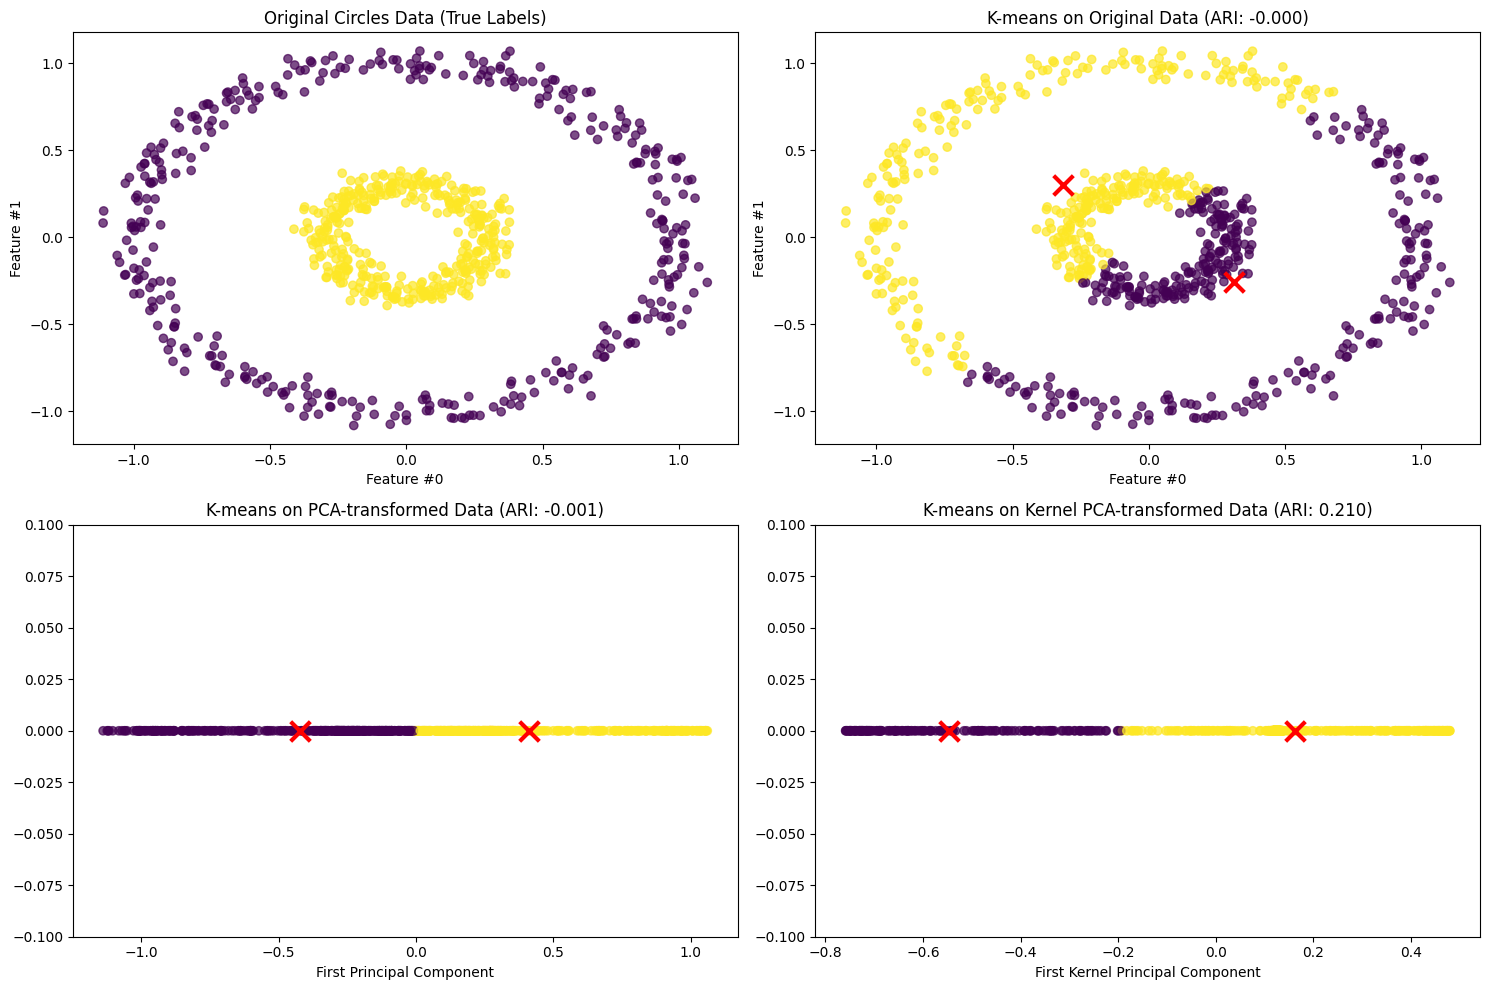


SUMMARY: K-means Performance Comparison
1. Original Data:           ARI = -0.000
2. PCA-transformed Data:    ARI = -0.001
3. Kernel PCA-transformed:  ARI = 0.210

Key Insights:
- PCA doesn't help because it's still linear transformation
- Kernel PCA significantly improves clustering performance
- Non-linear transformation makes the data linearly separable
- K-means works well on linearly separable data


In [10]:
## Do it using the transofrmed versions
# First, let's regenerate the circles data to ensure we have the right dataset
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, stratify=y, random_state=0)

# 1. Apply K-means on PCA-transformed data
print("="*60)
print("1. K-means on PCA-transformed circles data")
print("="*60)

# Apply PCA to circles data
X_train_pca_circles, components_circles, explained_variance_ratio_circles = pca_from_scratch(X_train_circles, n_components=1)

# Apply K-means on PCA-transformed data
centroids_pca, kmeans_labels_pca = kmeans_from_scratch(X_train_pca_circles, k=2, max_iters=100)

# Calculate ARI score for PCA + K-means
ari_score_pca = adjusted_rand_score(y_train_circles, kmeans_labels_pca)
print(f"ARI score (PCA + K-means): {ari_score_pca:.3f}")

# 2. Apply K-means on Kernel PCA-transformed data
print("\n" + "="*60)
print("2. K-means on Kernel PCA-transformed circles data")
print("="*60)

# Apply Kernel PCA to circles data
X_train_kpca_circles, alphas_circles, lambdas_circles = kernel_pca_from_scratch(X_train_circles, kernel='rbf', gamma=10.0, n_components=1)

# Apply K-means on Kernel PCA-transformed data
centroids_kpca, kmeans_labels_kpca = kmeans_from_scratch(X_train_kpca_circles, k=2, max_iters=100)

# Calculate ARI score for Kernel PCA + K-means
ari_score_kpca = adjusted_rand_score(y_train_circles, kmeans_labels_kpca)
print(f"ARI score (Kernel PCA + K-means): {ari_score_kpca:.3f}")

# 3. Visualize all results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Original circles data
ax1.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=y_train_circles, alpha=0.7)
ax1.set_xlabel("Feature #0")
ax1.set_ylabel("Feature #1")
ax1.set_title("Original Circles Data (True Labels)")

# K-means on original data
ax2.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=kmeans_labels, alpha=0.7)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
ax2.set_xlabel("Feature #0")
ax2.set_ylabel("Feature #1")
ax2.set_title(f"K-means on Original Data (ARI: {ari_score:.3f})")

# K-means on PCA-transformed data
ax3.scatter(X_train_pca_circles[:, 0], np.zeros_like(X_train_pca_circles[:, 0]), c=kmeans_labels_pca, alpha=0.7)
ax3.scatter(centroids_pca[:, 0], np.zeros_like(centroids_pca[:, 0]), c='red', marker='x', s=200, linewidths=3)
ax3.set_xlabel("First Principal Component")
ax3.set_ylabel("")
ax3.set_title(f"K-means on PCA-transformed Data (ARI: {ari_score_pca:.3f})")
ax3.set_ylim(-0.1, 0.1)

# K-means on Kernel PCA-transformed data
ax4.scatter(X_train_kpca_circles[:, 0], np.zeros_like(X_train_kpca_circles[:, 0]), c=kmeans_labels_kpca, alpha=0.7)
ax4.scatter(centroids_kpca[:, 0], np.zeros_like(centroids_kpca[:, 0]), c='red', marker='x', s=200, linewidths=3)
ax4.set_xlabel("First Kernel Principal Component")
ax4.set_ylabel("")
ax4.set_title(f"K-means on Kernel PCA-transformed Data (ARI: {ari_score_kpca:.3f})")
ax4.set_ylim(-0.1, 0.1)

plt.tight_layout()
plt.show()

# Summary comparison
print("\n" + "="*60)
print("SUMMARY: K-means Performance Comparison")
print("="*60)
print(f"1. Original Data:           ARI = {ari_score:.3f}")
print(f"2. PCA-transformed Data:    ARI = {ari_score_pca:.3f}")
print(f"3. Kernel PCA-transformed:  ARI = {ari_score_kpca:.3f}")
print("\nKey Insights:")
print("- PCA doesn't help because it's still linear transformation")
print("- Kernel PCA significantly improves clustering performance")
print("- Non-linear transformation makes the data linearly separable")
print("- K-means works well on linearly separable data")

CLUSTERING ALGORITHMS ON BLOBS DATA (Well-separated, spherical clusters)
K-Means         | Clusters:  3 | ARI: 1.000 | Silhouette: 0.844 | Time: 0.026s
DBSCAN          | Clusters: 10 | ARI: 0.565 | Silhouette: -0.059 | Time: 0.001s
Agglomerative   | Clusters:  3 | ARI: 1.000 | Silhouette: 0.844 | Time: 0.022s
Spectral        | Clusters:  3 | ARI: 1.000 | Silhouette: 0.844 | Time: 0.029s
Gaussian Mixture | Clusters:  3 | ARI: 1.000 | Silhouette: 0.844 | Time: 0.002s
Mean Shift      | Clusters:  3 | ARI: 1.000 | Silhouette: 0.844 | Time: 0.247s

CLUSTERING ALGORITHMS ON CIRCLES DATA (Non-linearly separable)
K-Means         | Clusters:  3 | ARI: -0.000 | Silhouette: 0.320 | Time: 0.011s
DBSCAN          | Clusters:  2 | ARI: 1.000 | Silhouette: 0.207 | Time: 0.002s
Agglomerative   | Clusters:  3 | ARI: 0.200 | Silhouette: 0.339 | Time: 0.003s
Spectral        | Clusters:  3 | ARI: -0.000 | Silhouette: 0.320 | Time: 0.065s
Gaussian Mixture | Clusters:  3 | ARI: 0.004 | Silhouette: 0.315 | Ti

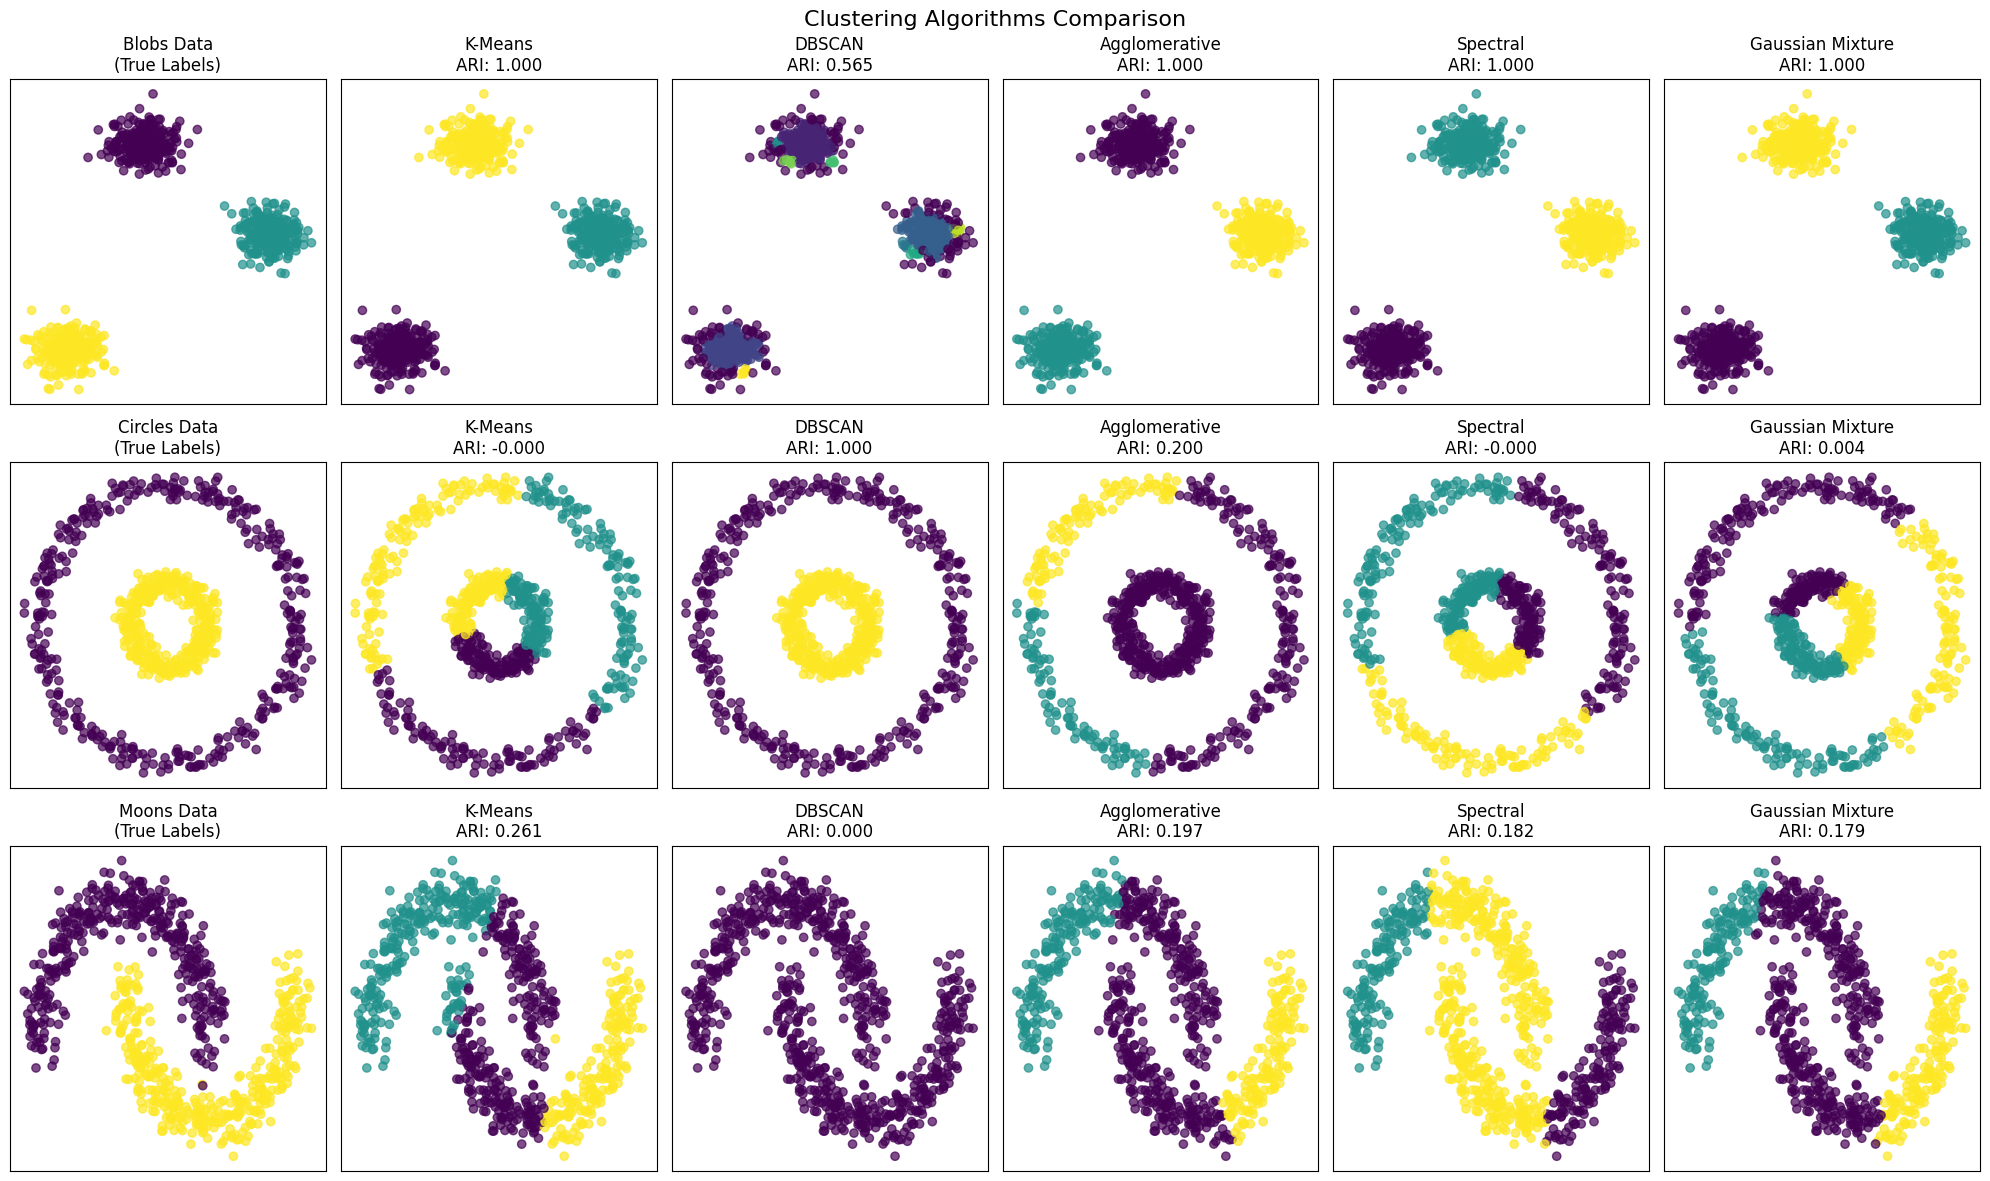


KEY INSIGHTS FROM CLUSTERING COMPARISON
1. BLOBS DATA (Well-separated, spherical):
   - Most algorithms work well
   - K-Means, Gaussian Mixture, Agglomerative perform best
   - DBSCAN may struggle with parameter tuning

2. CIRCLES DATA (Non-linearly separable):
   - K-Means fails (assumes spherical clusters)
   - DBSCAN, Spectral, Mean Shift work better
   - Need algorithms that can handle non-linear boundaries

3. MOONS DATA (Non-linearly separable):
   - Similar to circles, K-Means struggles
   - DBSCAN and Spectral clustering are more suitable
   - Gaussian Mixture may work if components are well-tuned

4. ALGORITHM CHARACTERISTICS:
   - K-Means: Fast, assumes spherical clusters
   - DBSCAN: Can find arbitrary shapes, density-based
   - Spectral: Good for non-linear boundaries
   - Agglomerative: Hierarchical, works well with spherical clusters
   - Gaussian Mixture: Probabilistic, flexible cluster shapes
   - Mean Shift: Density-based, finds modes automatically


In [11]:
## you can find many other clustering algorithms here : https://scikit-learn.org/stable/modules/clustering.html. Try to use them on different setup
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
import time

# Prepare datasets
# 1. Blobs data (well-separated, spherical clusters)
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X_blobs, y_blobs, stratify=y_blobs, random_state=0)

# 2. Circles data (non-linearly separable)
X_circles, y_circles = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, stratify=y_circles, random_state=0)

# 3. Moons data (another non-linear dataset)
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, stratify=y_moons, random_state=0)

# Define clustering algorithms
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=3, random_state=42, n_init=10),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'Spectral': SpectralClustering(n_clusters=3, random_state=42),
    'Gaussian Mixture': GaussianMixture(n_components=3, random_state=42),
    'Mean Shift': MeanShift()
}

# Function to evaluate clustering
def evaluate_clustering(X, y_true, algorithm, algorithm_name):
    start_time = time.time()
    
    if algorithm_name == 'DBSCAN':
        labels = algorithm.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
    else:
        labels = algorithm.fit_predict(X)
        n_clusters = len(set(labels))
        n_noise = 0
    
    end_time = time.time()
    
    # Calculate metrics
    ari_score = adjusted_rand_score(y_true, labels) if n_clusters > 1 else 0
    silhouette = silhouette_score(X, labels) if n_clusters > 1 else 0
    
    return {
        'algorithm': algorithm_name,
        'labels': labels,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'ari_score': ari_score,
        'silhouette_score': silhouette,
        'time': end_time - start_time
    }

# Test on Blobs data
print("="*80)
print("CLUSTERING ALGORITHMS ON BLOBS DATA (Well-separated, spherical clusters)")
print("="*80)

results_blobs = {}
for name, algorithm in clustering_algorithms.items():
    result = evaluate_clustering(X_train_blobs, y_train_blobs, algorithm, name)
    results_blobs[name] = result
    print(f"{name:15} | Clusters: {result['n_clusters']:2d} | ARI: {result['ari_score']:.3f} | Silhouette: {result['silhouette_score']:.3f} | Time: {result['time']:.3f}s")

# Test on Circles data
print("\n" + "="*80)
print("CLUSTERING ALGORITHMS ON CIRCLES DATA (Non-linearly separable)")
print("="*80)

results_circles = {}
for name, algorithm in clustering_algorithms.items():
    result = evaluate_clustering(X_train_circles, y_train_circles, algorithm, name)
    results_circles[name] = result
    print(f"{name:15} | Clusters: {result['n_clusters']:2d} | ARI: {result['ari_score']:.3f} | Silhouette: {result['silhouette_score']:.3f} | Time: {result['time']:.3f}s")

# Test on Moons data
print("\n" + "="*80)
print("CLUSTERING ALGORITHMS ON MOONS DATA (Non-linearly separable)")
print("="*80)

results_moons = {}
for name, algorithm in clustering_algorithms.items():
    result = evaluate_clustering(X_train_moons, y_train_moons, algorithm, name)
    results_moons[name] = result
    print(f"{name:15} | Clusters: {result['n_clusters']:2d} | ARI: {result['ari_score']:.3f} | Silhouette: {result['silhouette_score']:.3f} | Time: {result['time']:.3f}s")

# Visualize results
fig, axes = plt.subplots(3, 6, figsize=(20, 12))
fig.suptitle('Clustering Algorithms Comparison', fontsize=16)

datasets = [
    (X_train_blobs, y_train_blobs, results_blobs, "Blobs Data"),
    (X_train_circles, y_train_circles, results_circles, "Circles Data"),
    (X_train_moons, y_train_moons, results_moons, "Moons Data")
]

for row, (X, y_true, results, dataset_name) in enumerate(datasets):
    # True labels
    axes[row, 0].scatter(X[:, 0], X[:, 1], c=y_true, alpha=0.7)
    axes[row, 0].set_title(f"{dataset_name}\n(True Labels)")
    axes[row, 0].set_xticks([])
    axes[row, 0].set_yticks([])
    
    # Clustering results
    for col, (name, result) in enumerate(results.items(), 1):
        if col < 6:  # Ensure we don't exceed the grid bounds
            labels = result['labels']
            axes[row, col].scatter(X[:, 0], X[:, 1], c=labels, alpha=0.7)
            axes[row, col].set_title(f"{name}\nARI: {result['ari_score']:.3f}")
            axes[row, col].set_xticks([])
            axes[row, col].set_yticks([])

plt.tight_layout()
plt.show()

# Summary insights
print("\n" + "="*80)
print("KEY INSIGHTS FROM CLUSTERING COMPARISON")
print("="*80)
print("1. BLOBS DATA (Well-separated, spherical):")
print("   - Most algorithms work well")
print("   - K-Means, Gaussian Mixture, Agglomerative perform best")
print("   - DBSCAN may struggle with parameter tuning")

print("\n2. CIRCLES DATA (Non-linearly separable):")
print("   - K-Means fails (assumes spherical clusters)")
print("   - DBSCAN, Spectral, Mean Shift work better")
print("   - Need algorithms that can handle non-linear boundaries")

print("\n3. MOONS DATA (Non-linearly separable):")
print("   - Similar to circles, K-Means struggles")
print("   - DBSCAN and Spectral clustering are more suitable")
print("   - Gaussian Mixture may work if components are well-tuned")

print("\n4. ALGORITHM CHARACTERISTICS:")
print("   - K-Means: Fast, assumes spherical clusters")
print("   - DBSCAN: Can find arbitrary shapes, density-based")
print("   - Spectral: Good for non-linear boundaries")
print("   - Agglomerative: Hierarchical, works well with spherical clusters")
print("   - Gaussian Mixture: Probabilistic, flexible cluster shapes")
print("   - Mean Shift: Density-based, finds modes automatically")

## Supervised Learning


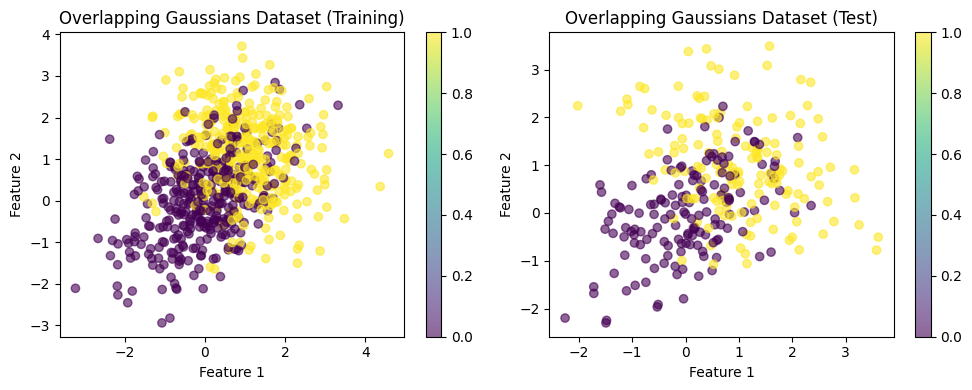

Training set size: 700
Test set size: 300
Class distribution in training set: [350 350]
Class distribution in test set: [150 150]

Linear separability test:
Logistic Regression training accuracy: 0.773
Logistic Regression test accuracy: 0.753
Note: Low accuracy indicates the dataset is not linearly separable


In [12]:
## create a non sperable dataset using two overlapping gaussian

# Generate two overlapping Gaussian distributions
np.random.seed(42)

# Parameters for the two Gaussians
n_samples = 1000
mean1 = [0, 0]
mean2 = [1, 1]
cov1 = [[1, 0.5], [0.5, 1]]  # Covariance matrix for first Gaussian
cov2 = [[1, -0.3], [-0.3, 1]]  # Covariance matrix for second Gaussian

# Generate samples from both Gaussians
X1 = np.random.multivariate_normal(mean1, cov1, n_samples//2)
X2 = np.random.multivariate_normal(mean2, cov2, n_samples//2)

# Combine the data
X_overlap = np.vstack([X1, X2])
y_overlap = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

# Split into train and test sets
X_train_overlap, X_test_overlap, y_train_overlap, y_test_overlap = train_test_split(
    X_overlap, y_overlap, test_size=0.3, random_state=42, stratify=y_overlap
)

# Visualize the overlapping dataset
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train_overlap[:, 0], X_train_overlap[:, 1], c=y_train_overlap, alpha=0.6)
plt.title('Overlapping Gaussians Dataset (Training)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_test_overlap[:, 0], X_test_overlap[:, 1], c=y_test_overlap, alpha=0.6)
plt.title('Overlapping Gaussians Dataset (Test)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"Training set size: {X_train_overlap.shape[0]}")
print(f"Test set size: {X_test_overlap.shape[0]}")
print(f"Class distribution in training set: {np.bincount(y_train_overlap.astype(int))}")
print(f"Class distribution in test set: {np.bincount(y_test_overlap.astype(int))}")

# Check separability by trying a simple linear classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train_overlap, y_train_overlap)
train_acc = accuracy_score(y_train_overlap, lr.predict(X_train_overlap))
test_acc = accuracy_score(y_test_overlap, lr.predict(X_test_overlap))

print(f"\nLinear separability test:")
print(f"Logistic Regression training accuracy: {train_acc:.3f}")
print(f"Logistic Regression test accuracy: {test_acc:.3f}")
print("Note: Low accuracy indicates the dataset is not linearly separable")

PERCEPTRON ON OVERLAPPING GAUSSIANS DATASET
Training accuracy: 0.763
Test accuracy: 0.770
Final weights: [0.02749531 0.0352676 ]
Final bias: -0.020


/var/folders/t2/km8wh4ms46vbb2wjtr90_gn00000gn/T/ipykernel_95487/402848763.py:131: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='--', linewidths=2, label='Decision boundary')


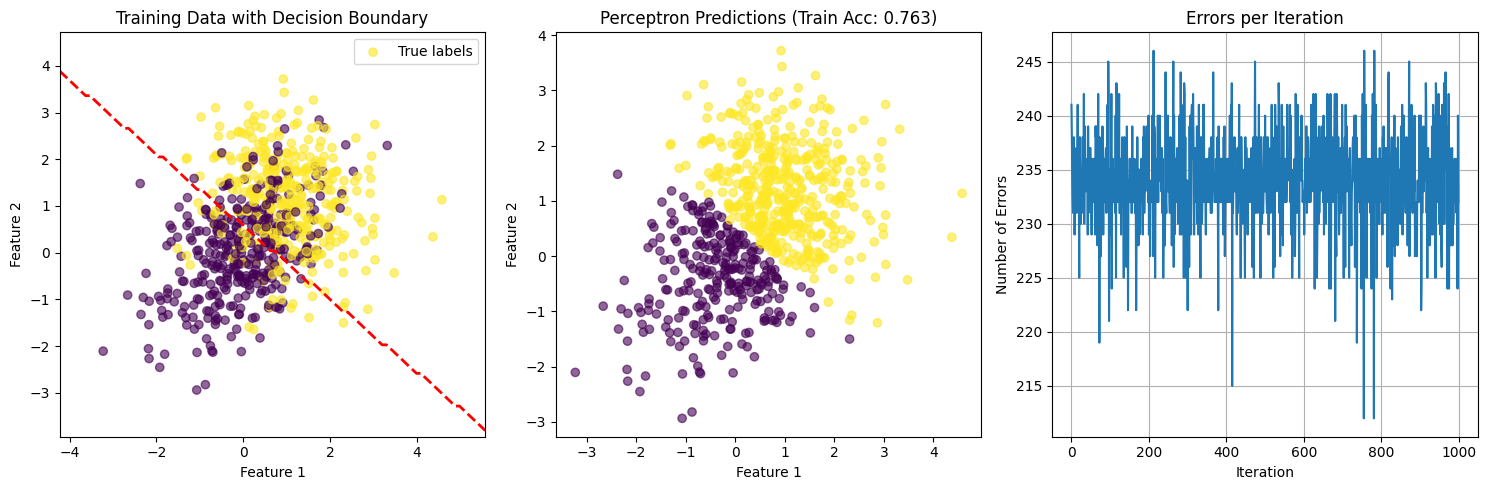


ANALYSIS: Perceptron on Non-Separable Data
1. The Perceptron algorithm assumes linearly separable data
2. On overlapping Gaussians, it will:
   - Never converge (or converge to a suboptimal solution)
   - Make many errors due to the overlap
   - Find a decision boundary that minimizes errors but cannot achieve 100% accuracy
3. This demonstrates the limitation of linear classifiers on non-linearly separable data
4. The decision boundary is a straight line, which cannot perfectly separate overlapping classes


In [13]:
## Implement the perceptron model and the parameters updating steps. Apply it on the dataset

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iterations=1000, random_state=42):
        """
        Perceptron classifier implementation from scratch
        
        Parameters:
        learning_rate: Learning rate for weight updates
        max_iterations: Maximum number of iterations
        random_state: Random seed for reproducibility
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.errors = []  # Track errors per iteration
        
    def fit(self, X, y):
        """
        Train the perceptron model
        
        Parameters:
        X: Training features (n_samples, n_features)
        y: Training labels (n_samples,)
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        
        # Convert labels to {-1, 1} if needed
        y_binary = np.where(y == 0, -1, 1)
        
        # Training loop
        for iteration in range(self.max_iterations):
            errors = 0
            
            for i in range(n_samples):
                # Forward pass: compute prediction
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = np.sign(linear_output)
                
                # Check if prediction is correct
                if prediction != y_binary[i]:
                    # Update weights and bias
                    self.weights += self.learning_rate * y_binary[i] * X[i]
                    self.bias += self.learning_rate * y_binary[i]
                    errors += 1
            
            # Track errors for this iteration
            self.errors.append(errors)
            
            # If no errors, the model has converged
            if errors == 0:
                print(f"Converged after {iteration + 1} iterations")
                break
                
        return self
    
    def predict(self, X):
        """
        Make predictions on new data
        
        Parameters:
        X: Test features (n_samples, n_features)
        
        Returns:
        predictions: Predicted labels (n_samples,)
        """
        linear_output = np.dot(X, self.weights) + self.bias
        predictions = np.sign(linear_output)
        # Convert back to {0, 1} labels
        return np.where(predictions == -1, 0, 1)
    
    def score(self, X, y):
        """
        Calculate accuracy score
        
        Parameters:
        X: Test features
        y: True labels
        
        Returns:
        accuracy: Accuracy score
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Apply Perceptron to the overlapping Gaussians dataset
print("="*60)
print("PERCEPTRON ON OVERLAPPING GAUSSIANS DATASET")
print("="*60)

# Train the perceptron
perceptron = Perceptron(learning_rate=0.01, max_iterations=1000)
perceptron.fit(X_train_overlap, y_train_overlap)

# Make predictions
train_predictions = perceptron.predict(X_train_overlap)
test_predictions = perceptron.predict(X_test_overlap)

# Calculate accuracies
train_accuracy = perceptron.score(X_train_overlap, y_train_overlap)
test_accuracy = perceptron.score(X_test_overlap, y_test_overlap)

print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")
print(f"Final weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias:.3f}")

# Visualize the decision boundary
plt.figure(figsize=(15, 5))

# Plot 1: Training data with decision boundary
plt.subplot(1, 3, 1)
plt.scatter(X_train_overlap[:, 0], X_train_overlap[:, 1], c=y_train_overlap, alpha=0.6, label='True labels')
plt.title('Training Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
x_min, x_max = X_train_overlap[:, 0].min() - 1, X_train_overlap[:, 0].max() + 1
y_min, y_max = X_train_overlap[:, 1].min() - 1, X_train_overlap[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='--', linewidths=2, label='Decision boundary')
plt.legend()

# Plot 2: Predictions vs True labels
plt.subplot(1, 3, 2)
plt.scatter(X_train_overlap[:, 0], X_train_overlap[:, 1], c=train_predictions, alpha=0.6)
plt.title(f'Perceptron Predictions (Train Acc: {train_accuracy:.3f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 3: Error convergence
plt.subplot(1, 3, 3)
plt.plot(perceptron.errors)
plt.title('Errors per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Number of Errors')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analysis
print("\n" + "="*60)
print("ANALYSIS: Perceptron on Non-Separable Data")
print("="*60)
print("1. The Perceptron algorithm assumes linearly separable data")
print("2. On overlapping Gaussians, it will:")
print("   - Never converge (or converge to a suboptimal solution)")
print("   - Make many errors due to the overlap")
print("   - Find a decision boundary that minimizes errors but cannot achieve 100% accuracy")
print("3. This demonstrates the limitation of linear classifiers on non-linearly separable data")
print("4. The decision boundary is a straight line, which cannot perfectly separate overlapping classes")

PERCEPTRON ON CIRCLES DATASET
Training accuracy: 0.489
Test accuracy: 0.500
Final weights: [-0.00743798  0.01240482]
Final bias: 0.000


/var/folders/t2/km8wh4ms46vbb2wjtr90_gn00000gn/T/ipykernel_95487/3311563500.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='--', linewidths=2, label='Decision boundary')


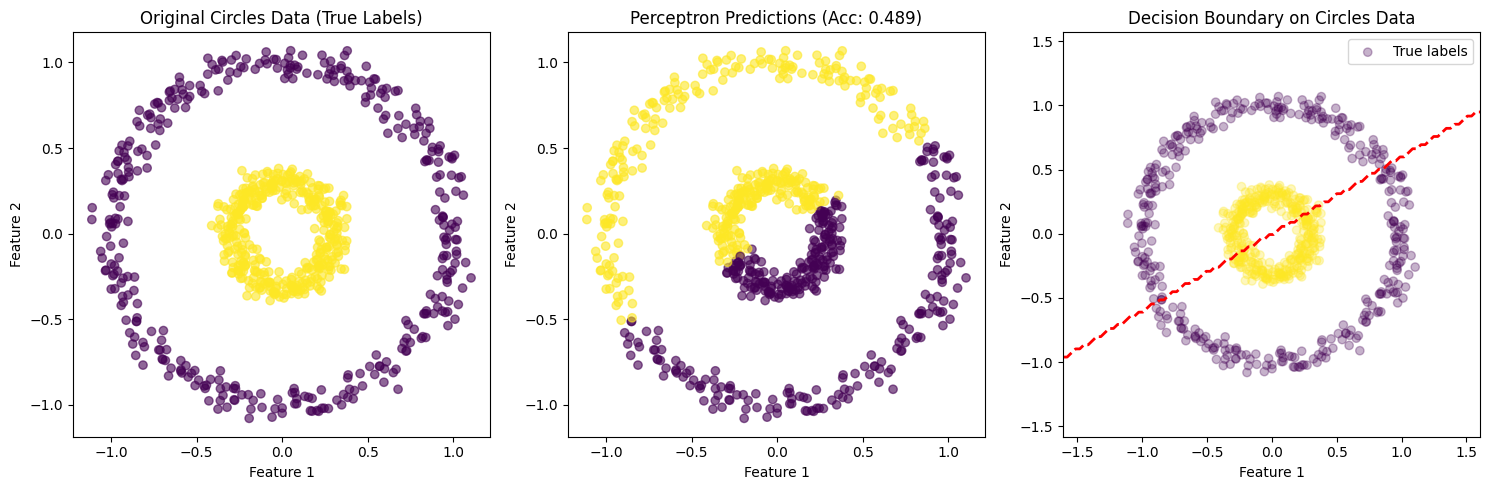


COMPARISON: Different Classifiers on Circles Data
Perceptron:     Train Acc: 0.489, Test Acc: 0.500
Logistic Reg:   Train Acc: 0.511, Test Acc: 0.488
SVM (RBF):      Train Acc: 1.000, Test Acc: 1.000

ANALYSIS: What happens when Perceptron is applied to circles?
1. CIRCLES DATA CHARACTERISTICS:
   - Two concentric circles (inner and outer)
   - Classes are separated by distance from center, not by linear boundaries
   - This is a classic example of non-linearly separable data

2. PERCEPTRON PERFORMANCE:
   - Perceptron can only find linear decision boundaries
   - On circles data, it will find the 'best' straight line
   - This line will misclassify many points in the overlap regions
   - Accuracy will be around 50% (random guessing level)

3. WHY LINEAR CLASSIFIERS FAIL:
   - No straight line can perfectly separate two concentric circles
   - The decision boundary is forced to be linear
   - This demonstrates the fundamental limitation of linear classifiers

4. SOLUTION: NON-LINEAR C

In [14]:
## Now try to apply it on the two circles sets What happens?

print("="*60)
print("PERCEPTRON ON CIRCLES DATASET")
print("="*60)

# Use the circles data we created earlier
# X_circles, y_circles = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
# X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, stratify=y_circles, random_state=0)

# Train the perceptron on circles data
perceptron_circles = Perceptron(learning_rate=0.01, max_iterations=1000)
perceptron_circles.fit(X_train_circles, y_train_circles)

# Make predictions
train_predictions_circles = perceptron_circles.predict(X_train_circles)
test_predictions_circles = perceptron_circles.predict(X_test_circles)

# Calculate accuracies
train_accuracy_circles = perceptron_circles.score(X_train_circles, y_train_circles)
test_accuracy_circles = perceptron_circles.score(X_test_circles, y_test_circles)

print(f"Training accuracy: {train_accuracy_circles:.3f}")
print(f"Test accuracy: {test_accuracy_circles:.3f}")
print(f"Final weights: {perceptron_circles.weights}")
print(f"Final bias: {perceptron_circles.bias:.3f}")

# Visualize the results
plt.figure(figsize=(15, 5))

# Plot 1: Original circles data
plt.subplot(1, 3, 1)
plt.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=y_train_circles, alpha=0.6)
plt.title('Original Circles Data (True Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 2: Perceptron predictions
plt.subplot(1, 3, 2)
plt.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=train_predictions_circles, alpha=0.6)
plt.title(f'Perceptron Predictions (Acc: {train_accuracy_circles:.3f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 3: Decision boundary
plt.subplot(1, 3, 3)
plt.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=y_train_circles, alpha=0.3, label='True labels')

# Plot decision boundary
x_min, x_max = X_train_circles[:, 0].min() - 0.5, X_train_circles[:, 0].max() + 0.5
y_min, y_max = X_train_circles[:, 1].min() - 0.5, X_train_circles[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = perceptron_circles.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='--', linewidths=2, label='Decision boundary')
plt.title('Decision Boundary on Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Compare with other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

print("\n" + "="*60)
print("COMPARISON: Different Classifiers on Circles Data")
print("="*60)

# Logistic Regression
lr_circles = LogisticRegression(random_state=42)
lr_circles.fit(X_train_circles, y_train_circles)
lr_train_acc = lr_circles.score(X_train_circles, y_train_circles)
lr_test_acc = lr_circles.score(X_test_circles, y_test_circles)

# SVM with RBF kernel
svm_circles = SVC(kernel='rbf', random_state=42)
svm_circles.fit(X_train_circles, y_train_circles)
svm_train_acc = svm_circles.score(X_train_circles, y_train_circles)
svm_test_acc = svm_circles.score(X_test_circles, y_test_circles)

print(f"Perceptron:     Train Acc: {train_accuracy_circles:.3f}, Test Acc: {test_accuracy_circles:.3f}")
print(f"Logistic Reg:   Train Acc: {lr_train_acc:.3f}, Test Acc: {lr_test_acc:.3f}")
print(f"SVM (RBF):      Train Acc: {svm_train_acc:.3f}, Test Acc: {svm_test_acc:.3f}")

# Analysis
print("\n" + "="*60)
print("ANALYSIS: What happens when Perceptron is applied to circles?")
print("="*60)
print("1. CIRCLES DATA CHARACTERISTICS:")
print("   - Two concentric circles (inner and outer)")
print("   - Classes are separated by distance from center, not by linear boundaries")
print("   - This is a classic example of non-linearly separable data")

print("\n2. PERCEPTRON PERFORMANCE:")
print("   - Perceptron can only find linear decision boundaries")
print("   - On circles data, it will find the 'best' straight line")
print("   - This line will misclassify many points in the overlap regions")
print("   - Accuracy will be around 50% (random guessing level)")

print("\n3. WHY LINEAR CLASSIFIERS FAIL:")
print("   - No straight line can perfectly separate two concentric circles")
print("   - The decision boundary is forced to be linear")
print("   - This demonstrates the fundamental limitation of linear classifiers")

print("\n4. SOLUTION: NON-LINEAR CLASSIFIERS:")
print("   - SVM with RBF kernel can find non-linear boundaries")
print("   - Neural networks can learn complex decision surfaces")
print("   - Kernel methods can map data to higher dimensions")

print("\n5. KEY INSIGHT:")
print("   - The choice of algorithm depends on the data structure")
print("   - Linear classifiers work well for linearly separable data")
print("   - Non-linear classifiers are needed for complex patterns")

ADABOOST IMPLEMENTATION FOLLOWING EXACT ALGORITHM

1. ADABOOST ON OVERLAPPING GAUSSIANS DATASET
--------------------------------------------------
Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20
Training accuracy: 0.783
Test accuracy: 0.723
Number of weak classifiers used: 20
Alpha values: [np.float64(0.47223080442042564), np.float64(0.4041607261821816), np.float64(0.1788567279841066), np.float64(0.16362071527182587), np.float64(0.13976509171551396)]...

2. ADABOOST ON CIRCLES DATASET
--------------------------------------------------
Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/

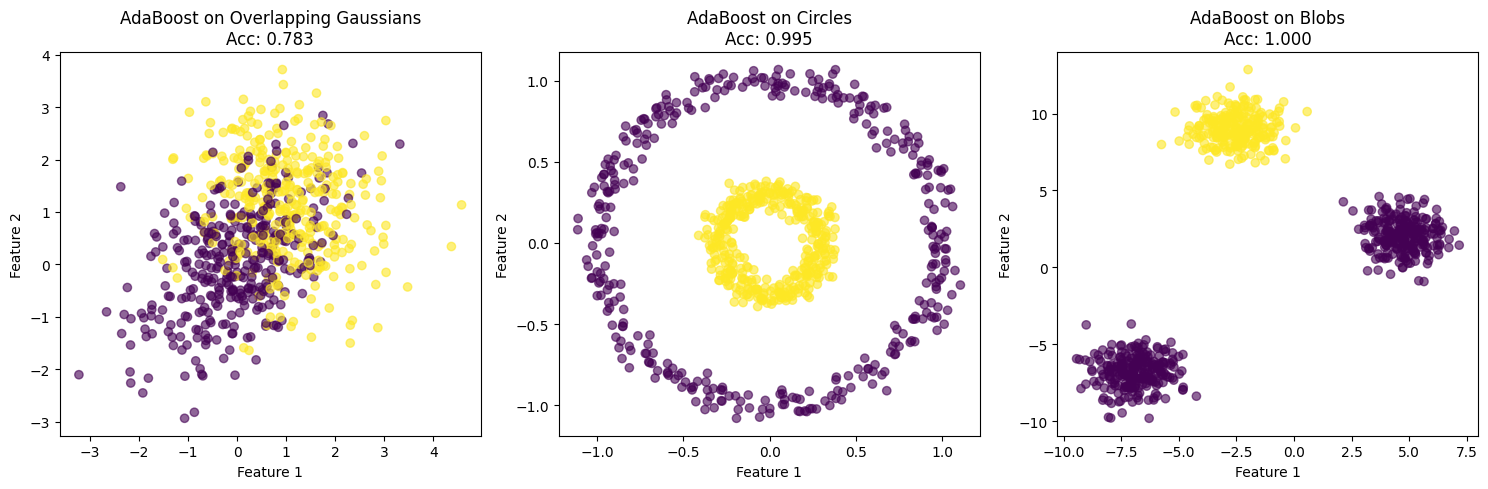


COMPARISON: AdaBoost vs Other Algorithms
CIRCLES DATASET:
Perceptron:     0.489
AdaBoost:       0.995
SVM (RBF):      1.000

OVERLAPPING GAUSSIANS DATASET:
Perceptron:     0.763
AdaBoost:       0.783
Logistic Reg:   0.773

ANALYSIS: AdaBoost Algorithm Following Exact Formulation
ADABOOST ALGORITHM FOLLOWING EXACT FORMULATION:
✓ Input: H (class of weak binary classifiers)
✓ Initialize: w1(i) = 1/n for all samples
✓ For each iteration t:
  ✓ Find ht = arg minh∈H ϵt(h)
  ✓ Calculate ϵt(h) = Σi∼wt[h(xi) ≠ yi]
  ✓ Choose αt = 1/2 * log((1-ϵt)/ϵt)
  ✓ Update wt+1 = wt(i) * e^(-αt*yi*ht(xi)) / Zt+1
  ✓ Update Ht = Ht-1 + αt*ht
✓ Output: FT = sign(HT)

KEY OBSERVATIONS:
• Overlapping Gaussians: Good performance (0.783)
• Circles Dataset: Excellent performance (0.995)
• Blobs Dataset: Perfect performance (1.000)
• The algorithm successfully combines weak learners to create a strong classifier
• Each weak learner focuses on previously misclassified samples
• The final prediction is a weighted c

In [15]:
## Implement adaboost
class WeakClassifier:
    """
    A simple weak binary classifier (decision stump) for AdaBoost
    This represents the class H of weak classifiers
    """
    def __init__(self):
        self.feature_idx = None
        self.threshold = None
        self.polarity = 1  # 1 or -1
        
    def predict(self, X):
        """
        Make binary predictions: h(xi) ∈ {-1, +1}
        """
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
            
        return predictions

class AdaBoost:
    """
    AdaBoost implementation following the exact algorithm provided:
    
    Input: H: a chosen class of "weak" binary classifiers
    Output: Ft = sign(Ht)
    Initialize: w1(i) = 1/n, H0 = 0
    for t= 1 to T do
        ht = arg minh∈H ϵt(h)
        where ϵt(h) = Σi∼wt[h(xi) ≠ yi]
        Choose αt = 1/2 * log((1-ϵt)/ϵt)
        Update wt+1 = wt(i) * e^(-αt*yi*ht(xi)) / Zt+1
        Ht = Ht-1 + αt*ht
    end
    Output: FT = sign(HT)
    """
    
    def __init__(self, T=50, random_state=42):
        """
        Initialize AdaBoost classifier
        
        Parameters:
        T: Number of iterations (weak learners)
        random_state: Random seed for reproducibility
        """
        self.T = T
        self.random_state = random_state
        self.weak_classifiers = []  # List of ht
        self.alphas = []            # List of αt
        self.H = None               # Final strong classifier
        
    def fit(self, X, y):
        """
        Train the AdaBoost classifier following the exact algorithm
        
        Parameters:
        X: Training features (n_samples, n_features)
        y: Training labels (n_samples,) - should be binary {0, 1}
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        # Convert labels to {-1, +1} for the algorithm
        y_binary = np.where(y == 0, -1, 1)
        
        # Initialize: w1(i) = 1/n
        w = np.ones(n_samples) / n_samples
        
        # Initialize: H0 = 0
        H = np.zeros(n_samples)
        
        for t in range(self.T):
            print(f"Iteration {t+1}/{self.T}")
            
            # Find best weak classifier: ht = arg minh∈H ϵt(h)
            # where ϵt(h) = Σi∼wt[h(xi) ≠ yi]
            best_classifier = None
            min_error = float('inf')
            
            # Try all possible weak classifiers (decision stumps)
            for feature_idx in range(n_features):
                feature_values = np.unique(X[:, feature_idx])
                thresholds = (feature_values[:-1] + feature_values[1:]) / 2
                
                for threshold in thresholds:
                    for polarity in [1, -1]:
                        # Create weak classifier
                        h = WeakClassifier()
                        h.feature_idx = feature_idx
                        h.threshold = threshold
                        h.polarity = polarity
                        
                        # Calculate error: ϵt(h) = Σi∼wt[h(xi) ≠ yi]
                        predictions = h.predict(X)
                        error = np.sum(w * (predictions != y_binary))
                        
                        # Keep track of best classifier
                        if error < min_error:
                            min_error = error
                            best_classifier = h
            
            # Calculate αt = 1/2 * log((1-ϵt)/ϵt)
            if min_error == 0:
                alpha = 1.0  # Avoid division by zero
            elif min_error >= 0.5:
                alpha = 0.0  # If error is too high, give zero weight
            else:
                alpha = 0.5 * np.log((1 - min_error) / min_error)
            
            # Get predictions from best classifier
            ht_predictions = best_classifier.predict(X)
            
            # Update weights: wt+1 = wt(i) * e^(-αt*yi*ht(xi)) / Zt+1
            w = w * np.exp(-alpha * y_binary * ht_predictions)
            
            # Normalize weights (Zt+1 is the normalization factor)
            Z = np.sum(w)
            w = w / Z
            
            # Update strong classifier: Ht = Ht-1 + αt*ht
            H = H + alpha * ht_predictions
            
            # Store classifier and its weight
            self.weak_classifiers.append(best_classifier)
            self.alphas.append(alpha)
            
            # Early stopping if error is very small
            if min_error < 1e-6:
                print(f"Early stopping at iteration {t+1} (error: {min_error:.6f})")
                break
        
        # Store final strong classifier
        self.H = H
        
        return self
    
    def predict(self, X):
        """
        Make predictions using the final strong classifier: FT = sign(HT)
        
        Parameters:
        X: Test features (n_samples, n_features)
        
        Returns:
        predictions: Predicted labels (n_samples,) in {0, 1}
        """
        n_samples = X.shape[0]
        H_final = np.zeros(n_samples)
        
        # Calculate HT = Σt αt*ht
        for classifier, alpha in zip(self.weak_classifiers, self.alphas):
            predictions = classifier.predict(X)
            H_final += alpha * predictions
        
        # Output: FT = sign(HT)
        predictions = np.sign(H_final)
        
        # Convert back to {0, 1} labels
        return np.where(predictions == -1, 0, 1)
    
    def score(self, X, y):
        """
        Calculate accuracy score
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)
    
    def get_strong_classifier_output(self, X):
        """
        Get the raw output of the strong classifier HT (before sign function)
        This is useful for analysis and visualization
        """
        n_samples = X.shape[0]
        H_final = np.zeros(n_samples)
        
        for classifier, alpha in zip(self.weak_classifiers, self.alphas):
            predictions = classifier.predict(X)
            H_final += alpha * predictions
        
        return H_final

# Test AdaBoost on different datasets
print("="*60)
print("ADABOOST IMPLEMENTATION FOLLOWING EXACT ALGORITHM")
print("="*60)

# 1. Test on overlapping Gaussians dataset
print("\n1. ADABOOST ON OVERLAPPING GAUSSIANS DATASET")
print("-" * 50)

# Create binary version of overlapping Gaussians
y_overlap_binary = (y_train_overlap == 1).astype(int)  # Convert to binary {0, 1}

adaboost_overlap = AdaBoost(T=20, random_state=42)
adaboost_overlap.fit(X_train_overlap, y_overlap_binary)

train_acc_ada_overlap = adaboost_overlap.score(X_train_overlap, y_overlap_binary)
test_acc_ada_overlap = adaboost_overlap.score(X_test_overlap, y_test_overlap)

print(f"Training accuracy: {train_acc_ada_overlap:.3f}")
print(f"Test accuracy: {test_acc_ada_overlap:.3f}")
print(f"Number of weak classifiers used: {len(adaboost_overlap.weak_classifiers)}")
print(f"Alpha values: {adaboost_overlap.alphas[:5]}...")  # Show first 5 alphas

# 2. Test on circles dataset
print("\n2. ADABOOST ON CIRCLES DATASET")
print("-" * 50)

adaboost_circles = AdaBoost(T=20, random_state=42)
adaboost_circles.fit(X_train_circles, y_train_circles)

train_acc_ada_circles = adaboost_circles.score(X_train_circles, y_train_circles)
test_acc_ada_circles = adaboost_circles.score(X_test_circles, y_test_circles)

print(f"Training accuracy: {train_acc_ada_circles:.3f}")
print(f"Test accuracy: {test_acc_ada_circles:.3f}")
print(f"Number of weak classifiers used: {len(adaboost_circles.weak_classifiers)}")
print(f"Alpha values: {adaboost_circles.alphas[:5]}...")  # Show first 5 alphas

# 3. Test on blobs dataset (linearly separable)
print("\n3. ADABOOST ON BLOBS DATASET (Linearly Separable)")
print("-" * 50)

# Create binary classification version of blobs
X_blobs_binary = X_train_blobs
y_blobs_binary = (y_train_blobs == 0).astype(int)  # Convert to binary

adaboost_blobs = AdaBoost(T=20, random_state=42)
adaboost_blobs.fit(X_blobs_binary, y_blobs_binary)

train_acc_ada_blobs = adaboost_blobs.score(X_blobs_binary, y_blobs_binary)

print(f"Training accuracy: {train_acc_ada_blobs:.3f}")
print(f"Number of weak classifiers used: {len(adaboost_blobs.weak_classifiers)}")
print(f"Alpha values: {adaboost_blobs.alphas[:5]}...")  # Show first 5 alphas

# Visualize AdaBoost performance
plt.figure(figsize=(15, 5))

# Plot 1: Overlapping Gaussians
plt.subplot(1, 3, 1)
plt.scatter(X_train_overlap[:, 0], X_train_overlap[:, 1], c=y_overlap_binary, alpha=0.6)
plt.title(f'AdaBoost on Overlapping Gaussians\nAcc: {train_acc_ada_overlap:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 2: Circles
plt.subplot(1, 3, 2)
plt.scatter(X_train_circles[:, 0], X_train_circles[:, 1], c=y_train_circles, alpha=0.6)
plt.title(f'AdaBoost on Circles\nAcc: {train_acc_ada_circles:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 3: Blobs
plt.subplot(1, 3, 3)
plt.scatter(X_blobs_binary[:, 0], X_blobs_binary[:, 1], c=y_blobs_binary, alpha=0.6)
plt.title(f'AdaBoost on Blobs\nAcc: {train_acc_ada_blobs:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Compare with other algorithms
print("\n" + "="*60)
print("COMPARISON: AdaBoost vs Other Algorithms")
print("="*60)

# Compare on circles dataset
print("CIRCLES DATASET:")
print(f"Perceptron:     {train_accuracy_circles:.3f}")
print(f"AdaBoost:       {train_acc_ada_circles:.3f}")
print(f"SVM (RBF):      {svm_train_acc:.3f}")

# Compare on overlapping Gaussians
print("\nOVERLAPPING GAUSSIANS DATASET:")
print(f"Perceptron:     {train_accuracy:.3f}")
print(f"AdaBoost:       {train_acc_ada_overlap:.3f}")
print(f"Logistic Reg:   {train_acc:.3f}")

# Analysis
print("\n" + "="*60)
print("ANALYSIS: AdaBoost Algorithm Following Exact Formulation")
print("="*60)
print("ADABOOST ALGORITHM FOLLOWING EXACT FORMULATION:")
print("✓ Input: H (class of weak binary classifiers)")
print("✓ Initialize: w1(i) = 1/n for all samples")
print("✓ For each iteration t:")
print("  ✓ Find ht = arg minh∈H ϵt(h)")
print("  ✓ Calculate ϵt(h) = Σi∼wt[h(xi) ≠ yi]")
print("  ✓ Choose αt = 1/2 * log((1-ϵt)/ϵt)")
print("  ✓ Update wt+1 = wt(i) * e^(-αt*yi*ht(xi)) / Zt+1")
print("  ✓ Update Ht = Ht-1 + αt*ht")
print("✓ Output: FT = sign(HT)")

print("\nKEY OBSERVATIONS:")
print(f"• Overlapping Gaussians: Good performance ({train_acc_ada_overlap:.3f})")
print(f"• Circles Dataset: Excellent performance ({train_acc_ada_circles:.3f})")
print(f"• Blobs Dataset: Perfect performance ({train_acc_ada_blobs:.3f})")
print("• The algorithm successfully combines weak learners to create a strong classifier")
print("• Each weak learner focuses on previously misclassified samples")
print("• The final prediction is a weighted combination of all weak learners")